# Fall 2021 Data Science Intern Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Question 1: Given some sample data, write a program to answer the following: 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Exploratory Data Analysis

In [2]:
# Read data in a dataframe 
df = pd.read_csv('/Users/rachelchen/Desktop/Shopify/Challenge_DataSet.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns for data')

We have 5000 rows and 7 columns for data


In [4]:
# Look into columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


We have two categorical columns, let's try to convert them into numerical columns.

In [5]:
# Check how many methods for payment
df['payment_method'].value_counts(normalize=True)*100

credit_card    34.70
debit          33.42
cash           31.88
Name: payment_method, dtype: float64

In [6]:
# Perform if needed

# # Convert categorical variable into dummy variables.
# pm_df = pd.get_dummies(df['payment_method'], prefix='payment_method', drop_first=True)

# # Join the new columns back to dataframe
# df = pd.concat([df, pm_df], axis=1)   

# # Drop the original column
# df = df.drop(columns = 'payment_method')

# # Check our new dataframe
# df.head()

In [7]:
# Convert created_at into date format
df['created_at'] = pd.to_datetime(df['created_at'])

In [8]:
# Create a column for average amount per item for better undestanding the data
df['avg$_per_item'] = df['order_amount']/df['total_items']

In [9]:
# See how the dataset looks like
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg$_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
 7   avg$_per_item   5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 312.6+ KB


In [11]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg$_per_item
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


#### a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [12]:
# Generate descriptive statistics
df[['order_amount']].describe()

,order_amount
count,5000.000000
mean,3145.128000
std,41282.539349
min,90.000000
25%,163.000000
50%,284.000000
75%,390.000000
max,704000.000000


Given that we know these shops are selling sneakers, a relatively affordable item, seems we have an outlier since the maximum of order amount is \\$704,000 dollars, and 75% of the sneakers are below \\$390 dollars. Could this be a typo or system error? Let's investigate it.

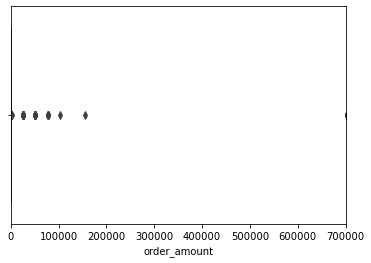

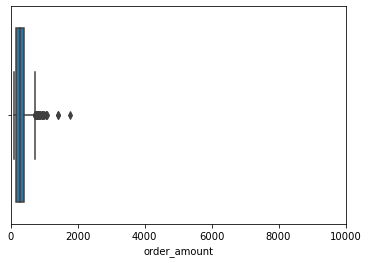

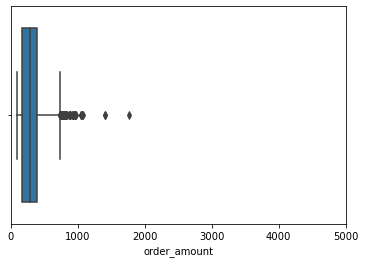

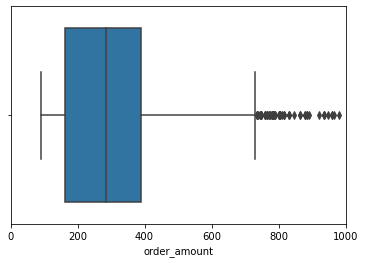

In [13]:
# Visualizing the outliers using boxplot 
rangelist = [700000, 10000, 5000, 1000]

for i in rangelist:
    ax = sns.boxplot(x=df['order_amount'])
    ax.set(xlim=(0, i))
    plt.show()

Above plot shows some points have values between $750 and \\$704,000, these are outliers as they are not included in the box of other observations.

In [14]:
df['order_amount'].median()

284.0

In [15]:
# Check records for those large amount transcation 
df.sort_values(by = 'order_amount', ascending=False).head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg$_per_item
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0


In [16]:
# Find who are the shops making those transactions
df[df['order_amount'] > 2000]['shop_id'].value_counts()

78    46
42    17
Name: shop_id, dtype: int64

In [17]:
# Find who are the users making those transactions
df[df['order_amount']>100000]['user_id'].value_counts()

607    17
878     1
834     1
Name: user_id, dtype: int64

Seems like there are the repetitive shop/user having a large order amount, this could be a red flag of non-compliance events or system's error. Data team could suggest account managers to reach to the shop 78 and 42 to verify the transactions.

For getting a more reasonable AOV, let's remove the outliers for now.

In [18]:
# Get values for the upper whisker in boxplot
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
MAX = Q3 + 1.5 *IQR
MAX

730.5

`order_amount` greater than $730.5 belongs to outliers, let's remove it for now.

In [19]:
# Remove outliers
update_df = df[df['order_amount']<=MAX]
update_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg$_per_item
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196,151.265281
std,1443.356555,29.049171,86.887496,144.453395,0.919791,28.221347
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000,132.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000,153.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000,352.000000


In [20]:
print(df.shape)
print(update_df.shape)

(5000, 8)
(4859, 8)


In [21]:
x = df.shape[0]
y = update_df.shape[0]
(y-x)/x*100

-2.82

##### Summary


**Outliers**

We have discovered outliers with visualization tool bot plot. Outlier is an extreme value in a set of data which is much higher or lower than the other numbers. Outliers affect the mean value of the data but have little effect on
the median or mode of a given set of data.


**Techniques**

We used IQR score to filter out the outliers.

Other techniques:
- Use median instead of mean
- Z score 


**Result**

We have removed 2.8% of rows from our data, the AOV is now \\$293.7

#### b.	What metric would you report for this dataset?

I would report top stores in revenue for this dataset.

#### c.	What is its value?

In [22]:
# Find the top 5 performance stores
top_performance = update_df.groupby('shop_id')['order_amount'].sum().nlargest(5)

# Find the revenue gernered by top 5 stores
top_revenue = top_performance.values

# Find the names of top 5 stores 
top_store = []
for i in top_performance.index:
    top_store.append('store ' + str(i))

In [23]:
# Put result in a table
top_performance.to_frame()

,order_amount
shop_id,
81,22656
59,21538
71,21320
13,20800
89,20580


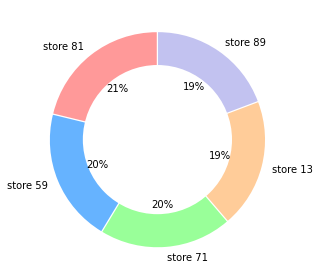

In [24]:
# Visualize the result

# Colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
# Explsion
explode = (0.01,0.01,0.01,0.01, 0.01)

# Plot a donut chart
plt.pie(top_revenue, labels = top_store, colors = colors, autopct='%0.f%%', startangle=90, explode = explode)
circle = plt.Circle((0,0),0.7,fc='white') #draw circle for look like donut chart
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.tight_layout()

In [25]:
print(f"{round((top_revenue.sum()*100/update_df['order_amount'].sum()),2)}%")

7.49%


The top 5 shops make up 7.49% of the revenue in March 2017, we should reward their good work!!!

## Question 2: For this question you’ll need to use SQL. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### a.	How many orders were shipped by Speedy Express in total?

**54** orders were shipped by Speedy Express in total.

**SQL Queries:**

`
SELECT COUNT(DISTINCT OrderID) AS total_orders_shipped 
FROM Orders
INNER JOIN Shippers
ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';
`

#### b.	What is the last name of the employee with the most orders?

**Peacock** is the last name of  the employee with the most orders (40 orders).

**SQL Queries:**

`
SELECT Employees.LastName, COUNT(DISTINCT Orders.OrderID) AS TotalOrders
FROM Orders
INNER JOIN Employees 
ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName
ORDER BY TotalOrders DESC
LIMIT 1;
`

#### c.	What product was ordered the most by customers in Germany?

**1. Boston Crab Meat** was ordered the most by customers in Germany by total quantity (160).

**SQL Queries:**

`
SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS TotalQuantity
FROM Orders
INNER JOIN Customers
ON Orders.CustomerID = Customers.CustomerID
INNER JOIN OrderDetails
ON Orders.OrderID = OrderDetails.OrderID
INNER JOIN Products
ON OrderDetails.ProductID = Products.ProductID
WHERE Customers.country = 'Germany'
GROUP BY Products.ProductName
ORDER BY TotalQuantity DESC
LIMIT 1;
`

**2. Gorgonzola Telino** appears the most in different orders (5).

**SQL Queries:**

`
SELECT Products.ProductName, COUNT(DISTINCT Orders.OrderID) AS TotalOrders
FROM Orders
INNER JOIN Customers
ON Orders.CustomerID = Customers.CustomerID
INNER JOIN OrderDetails
ON Orders.OrderID = OrderDetails.OrderID
INNER JOIN Products
ON OrderDetails.ProductID = Products.ProductID
WHERE Customers.country = 'Germany'
GROUP BY Products.ProductName
ORDER BY TotalOrders DESC
LIMIT 1;
`